# Sub

In [ ]:
from datascience import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('fivethirtyeight')
fpath = 'https://raw.githubusercontent.com/Sianus/US_Study/wobin/DataScience%20Project/Project/2022.06.21%20Project/Suicid/archive/who_suicide_statistics.csv'

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [ ]:
tmp = Table.read_table(fpath) # Table로 읽어오기
tmp

country,year,sex,age,suicides_no,population
Albania,1985,female,15-24 years,nan,277900
Albania,1985,female,25-34 years,nan,246800
Albania,1985,female,35-54 years,nan,267500
Albania,1985,female,5-14 years,nan,298300
Albania,1985,female,55-74 years,nan,138700
Albania,1985,female,75+ years,nan,34200
Albania,1985,male,15-24 years,nan,301400
Albania,1985,male,25-34 years,nan,264200
Albania,1985,male,35-54 years,nan,296700
Albania,1985,male,5-14 years,nan,325800


In [ ]:
# 1990년도부터
tmp = tmp.where('year', are.above_or_equal_to(1990))
tmp

country,year,sex,age,suicides_no,population
Albania,1990,female,15-24 years,nan,305900
Albania,1990,female,25-34 years,nan,278000
Albania,1990,female,35-54 years,nan,308300
Albania,1990,female,5-14 years,nan,329600
Albania,1990,female,55-74 years,nan,156400
Albania,1990,female,75+ years,nan,37600
Albania,1990,male,15-24 years,nan,325600
Albania,1990,male,25-34 years,nan,295100
Albania,1990,male,35-54 years,nan,337700
Albania,1990,male,5-14 years,nan,355600


In [ ]:
# nan 제거
tmp=tmp.where('suicides_no', are.above_or_equal_to(0))
tmp=tmp.where('population', are.above_or_equal_to(0))
tmp

country,year,sex,age,suicides_no,population
Albania,1992,female,15-24 years,7,292400
Albania,1992,female,25-34 years,4,267400
Albania,1992,female,35-54 years,2,323100
Albania,1992,female,5-14 years,0,336700
Albania,1992,female,55-74 years,1,164900
Albania,1992,female,75+ years,0,38700
Albania,1992,male,15-24 years,9,263700
Albania,1992,male,25-34 years,7,245500
Albania,1992,male,35-54 years,12,343800
Albania,1992,male,5-14 years,0,362900


In [ ]:
# 55세 이상 데이터 삭제
tmp = tmp.where('age', are.not_equal_to('55-74 years')).where('age', are.not_equal_to('75+ years'))
tmp

country,year,sex,age,suicides_no,population
Albania,1992,female,15-24 years,7,292400
Albania,1992,female,25-34 years,4,267400
Albania,1992,female,35-54 years,2,323100
Albania,1992,female,5-14 years,0,336700
Albania,1992,male,15-24 years,9,263700
Albania,1992,male,25-34 years,7,245500
Albania,1992,male,35-54 years,12,343800
Albania,1992,male,5-14 years,0,362900
Albania,1993,female,15-24 years,10,285300
Albania,1993,female,25-34 years,7,261800


# Main 1 : Korea 정보

> 2009~2011은 왜 자살률이 높을까?   
> 자살률이 급 상승한 년도에는 무슨 이유가 있을까?

In [ ]:
# 한국 데이터만 뽑아오기
korea = tmp.where('country', 'Republic of Korea')
korea

country,year,sex,age,suicides_no,population
Republic of Korea,1990,female,15-24 years,232,4.2505e+06
Republic of Korea,1990,female,25-34 years,269,4.1024e+06
Republic of Korea,1990,female,35-54 years,242,4.7813e+06
Republic of Korea,1990,female,5-14 years,14,3.7693e+06
Republic of Korea,1990,male,15-24 years,480,4.5022e+06
Republic of Korea,1990,male,25-34 years,550,4.2701e+06
Republic of Korea,1990,male,35-54 years,736,4.9813e+06
Republic of Korea,1990,male,5-14 years,26,4.0282e+06
Republic of Korea,1991,female,15-24 years,201,4.2265e+06
Republic of Korea,1991,female,25-34 years,247,4.115e+06


In [ ]:
# e값 없애기
korea['population']/=1000
korea.relabeled('population', 'population(unit : 1000)')

country,year,sex,age,suicides_no,population(unit : 1000)
Republic of Korea,1990,female,15-24 years,232,4250.5
Republic of Korea,1990,female,25-34 years,269,4102.4
Republic of Korea,1990,female,35-54 years,242,4781.3
Republic of Korea,1990,female,5-14 years,14,3769.3
Republic of Korea,1990,male,15-24 years,480,4502.2
Republic of Korea,1990,male,25-34 years,550,4270.1
Republic of Korea,1990,male,35-54 years,736,4981.3
Republic of Korea,1990,male,5-14 years,26,4028.2
Republic of Korea,1991,female,15-24 years,201,4226.5
Republic of Korea,1991,female,25-34 years,247,4115


In [ ]:
# 연도별로 성별, 연령 분류 없이 Table 하나 생성
korea_total = korea.group('year', sum).select(0,4,5)
korea_total

year,suicides_no sum,population sum
1990,2549,34685.3
1991,2473,34883
1992,2797,35048.9
1993,3211,35212.8
1994,3204,35381.5
1995,3684,36145.7
1996,4431,36332.9
1997,4444,36486.1
1998,6204,36648.8
1999,4945,36856.3


In [ ]:
# 연도별 자살률 분석을 위해 자살률 Table에 추가
korea_per = korea_total.with_column('suicide per', (korea_total.column(1)/korea_total.column(2))*100)
korea_per

year,suicides_no sum,population sum,suicide per
1990,2549,34685.3,7.34893
1991,2473,34883,7.08941
1992,2797,35048.9,7.98028
1993,3211,35212.8,9.11884
1994,3204,35381.5,9.05558
1995,3684,36145.7,10.1921
1996,4431,36332.9,12.1956
1997,4444,36486.1,12.18
1998,6204,36648.8,16.9282
1999,4945,36856.3,13.417


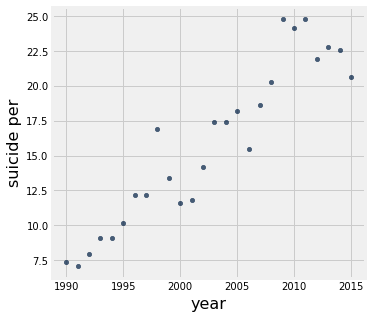

In [ ]:
for_hist=korea_per.select(0,3)
for_hist.scatter('year', 'suicide per')

In [ ]:
# 자살률이 가장 높았던 시기를 뽑아보자
top_rate = korea_per.sort('suicide per', descending=True)
top_rate

year,suicides_no sum,population sum,suicide per
2011,9165,36972.2,24.7889
2009,9299,37538.9,24.7717
2010,8994,37280.6,24.1251
2013,8279,36344.7,22.7791
2014,8110,35969.4,22.5469
2012,8036,36672.6,21.9128
2015,7318,35521.5,20.6016
2008,7625,37651.5,20.2515
2007,7034,37743.7,18.6362
2005,6865,37679.3,18.2196


In [ ]:
# 자살률이 급격하게 증가한 년도 찾기
results = make_array()
col = 3
for i in np.arange(0,24) :
  difference = top_rate.column(col).take(i) - top_rate.column(col).take(i+1)
  results = np.append(results, difference)

results.argmax()
# results의 0번 = 0~1의 차이
# results의 1번 = 1~2의 차이
# results의 2번 = 2~3의 차이
# results의 n번 = n~n+1의 차이 => n번 인덱스 년도가 가장 크게 증가한 년도

7

In [ ]:
results

array([0.0172447 , 0.64653039, 1.34598185, 0.23220966, 0.63409385,
       1.31125139, 0.35007407, 1.6152697 , 0.41667454, 0.83686968,
       0.0083763 , 0.44607132, 1.49387837, 1.25349048, 0.76390634,
       1.22141519, 0.01557743, 0.33463083, 0.23387819, 1.41938815,
       1.07324056, 0.06326325, 1.07530091, 0.63134442])

In [ ]:
# 자살률 증가 순서에 따른 3개
temp=results
for i in np.arange(0,3):
  increase_rank_idx = make_array()
  increase_rank_idx = np.append(increase_rank_idx, results.argmax())
  temp = np.delete(results, results.argmax())
  temp.max()

increase_rank_idx

array([7.])

In [ ]:
# 원본 데이터에서 2011년, 2010년, 2009년 각각 새로운 변수에 저장
per2011 = korea.where('year', 2011)
per2009 = korea.where('year', 2009)
per2010 = korea.where('year', 2010)
per2011

country,year,sex,age,suicides_no,population
Republic of Korea,2011,female,15-24 years,347,3161.44
Republic of Korea,2011,female,25-34 years,901,3682.79
Republic of Korea,2011,female,35-54 years,1694,8426.58
Republic of Korea,2011,female,5-14 years,26,2677.56
Republic of Korea,2011,male,15-24 years,528,3543.61
Republic of Korea,2011,male,25-34 years,1384,3868.8
Republic of Korea,2011,male,35-54 years,4255,8696.95
Republic of Korea,2011,male,5-14 years,30,2914.47


In [ ]:
# 각 연령대별 자살률 추가하고 비율 기준 정렬 및 suicides_no와 population 행 삭제
per2011=per2011.with_column('per(%)', (per2011.column(4)/per2011.column(5))*100).sort('per(%)', descending=True).select(1,2,3,6)
per2009=per2009.with_column('per(%)', (per2009.column(4)/per2009.column(5))*100).sort('per(%)', descending=True).select(1,2,3,6)
per2010=per2010.with_column('per(%)', (per2010.column(4)/per2010.column(5))*100).sort('per(%)', descending=True).select(1,2,3,6)
per2011

year,sex,age,per(%)
2011,male,35-54 years,48.9252
2011,male,25-34 years,35.7733
2011,female,25-34 years,24.4651
2011,female,35-54 years,20.1031
2011,male,15-24 years,14.9001
2011,female,15-24 years,10.976
2011,male,5-14 years,1.02935
2011,female,5-14 years,0.971033


In [ ]:
per2010

year,sex,age,per(%)
2010,male,35-54 years,46.6517
2010,male,25-34 years,33.0497
2010,female,25-34 years,25.8762
2010,female,35-54 years,20.7459
2010,male,15-24 years,14.0469
2010,female,15-24 years,11.8567
2010,female,5-14 years,1.21722
2010,male,5-14 years,0.883877


In [ ]:
per2009

year,sex,age,per(%)
2009,male,35-54 years,46.9533
2009,male,25-34 years,31.3249
2009,female,25-34 years,29.1608
2009,female,35-54 years,21.3163
2009,male,15-24 years,15.8084
2009,female,15-24 years,14.7414
2009,female,5-14 years,1.44427
2009,male,5-14 years,1.21905


# Sub 1 한국 이외의 국가와 IMF

> IMF는 아시아 동시에 나타남   
> 일본과 중국, 태국까지만 같이 알아보겠음

In [ ]:
korea = tmp.where('country', 'Republic of Korea')

In [ ]:
japan = tmp.where('country', 'Japan')
usa = tmp.where('country', 'United States of America')
thailand = tmp.where('country', 'Thailand')

In [ ]:
japan['population']/=1000
usa['population']/=1000
thailand['population']/=1000
japan.relabeled('population', 'population(unit : 1000)')
usa.relabeled('population', 'population(unit : 1000)')
thailand.relabeled('population', 'population(unit : 1000)')

country,year,sex,age,suicides_no,population(unit : 1000)
Thailand,1990,female,15-24 years,511,5917.57
Thailand,1990,female,25-34 years,339,4920.57
Thailand,1990,female,35-54 years,290,6146.48
Thailand,1990,female,5-14 years,43,5772.12
Thailand,1990,male,15-24 years,753,6077.08
Thailand,1990,male,25-34 years,622,4749.65
Thailand,1990,male,35-54 years,665,5708.26
Thailand,1990,male,5-14 years,51,5967.62
Thailand,1991,female,15-24 years,460,5931.43
Thailand,1991,female,25-34 years,277,4997.93


In [ ]:
# 연도별로 성별, 연령 분류 없이 Table 하나 생성
japan_total = japan.group('year', sum).select(0,4,5)
usa_total = usa.group('year', sum).select(0,4,5)
thailand_total = thailand.group('year', sum).select(0,4,5)


In [ ]:
# 연도별 자살률 분석을 위해 자살률 Table에 추가
japan_per = japan_total.with_column('suicide per', (japan_total.column(1)/japan_total.column(2))*100)
usa_per = usa_total.with_column('suicide per', (usa_total.column(1)/usa_total.column(2))*100)
thailand_per = thailand_total.with_column('suicide per', (thailand_total.column(1)/thailand_total.column(2))*100)

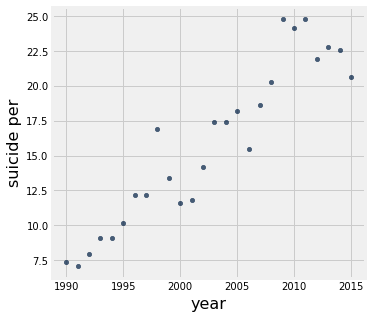

In [ ]:
# 한국 자살률표
korea_graph=korea_per.select(0,3)
korea_graph.scatter('year', 'suicide per')

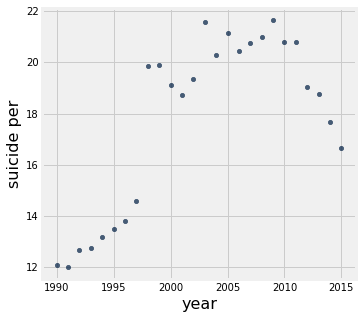

In [ ]:
# 일본 자살률표
japan_graph=japan_per.select(0,3)
japan_graph.scatter('year', 'suicide per')

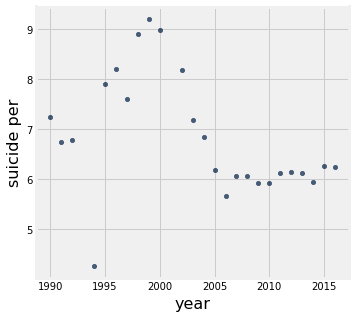

In [ ]:
# 태국 자살률표
thailand_graph=thailand_per.select(0,3)
thailand_graph.scatter('year', 'suicide per')

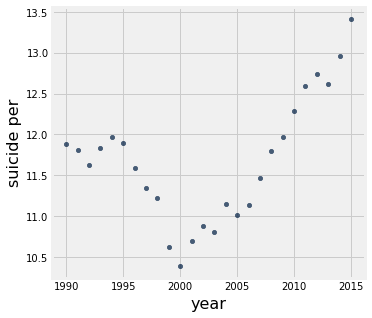

In [ ]:
usa_graph=usa_per.select(0,3)
usa_graph.scatter('year', 'suicide per')

In [ ]:
# plt.plot(kospi['년도'], kospi['코스피지수'],label='kospi')
# plt.plot(kospi['년도'], kospi['코스닥지수'],label='kosdaq')
# plt.plot(korea_25_34['year'], korea_25_34['per'], label = '25-34 years')
# plt.plot(korea_35_54['year'], korea_35_54['per'], label = '35-54 years')
# plt.legend()
# ax.text(1997,0.027,'IMF')

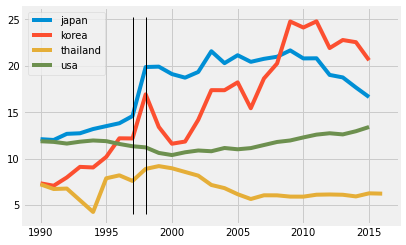

In [ ]:
plt.plot(japan_graph['year'], japan_graph['suicide per'], label='japan')
plt.plot(korea_graph['year'], korea_graph['suicide per'], label='korea')
plt.plot(thailand_graph['year'], thailand_graph['suicide per'], label='thailand')
plt.plot(usa_graph['year'], usa_graph['suicide per'], label='usa')
plt.legend()
plt.plot([1997 for _ in range(100)], np.arange(4, 25.5, 0.215), color='black', linewidth=1)
plt.plot([1998 for _ in range(100)], np.arange(4, 25.5, 0.215), color='black', linewidth=1)